# IMPORT

In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Leitura dos arquivos

In [167]:
train = pd.read_csv("C:/My_project/RegressaoLogistica/Titanic/DatasetTitanicKaggle/train.csv")

In [259]:
test = pd.read_csv("C:/My_project/RegressaoLogistica/Titanic/DatasetTitanicKaggle/test.csv")

In [295]:
modelo = pd.read_csv('C:/My_project/RegressaoLogistica/Titanic/DatasetTitanicKaggle/PrimeiroModelo_regressaoLogisticaTitanic.csv')

In [298]:
modelo.shape

(418, 2)

# Primeira análise

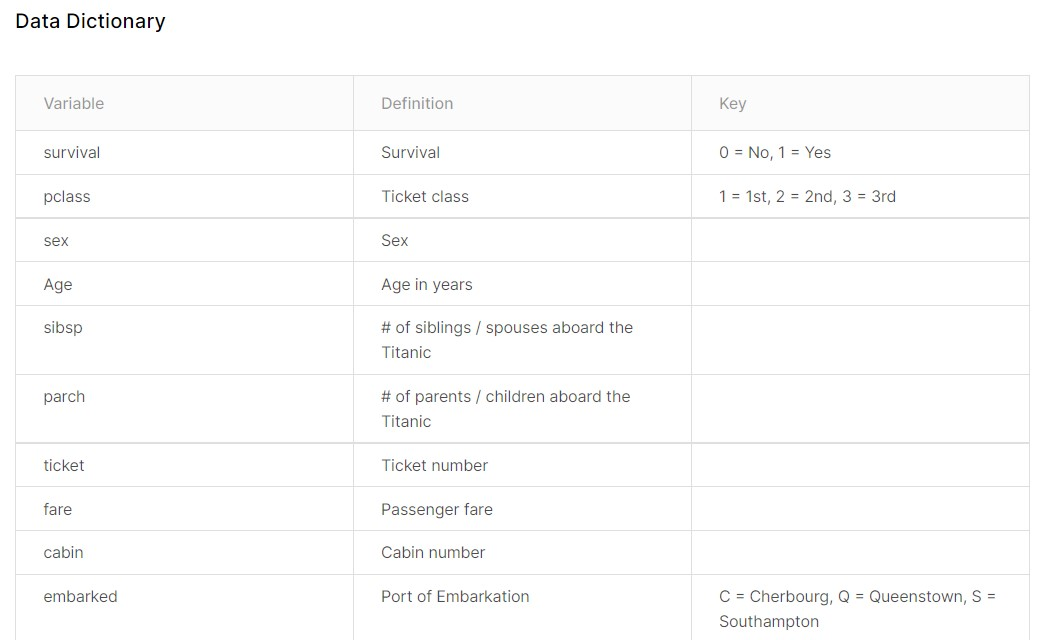

In [169]:
Image(filename='C:/My_project/RegressaoLogistica/Titanic/legendasTitanic2.jpg')

In [170]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Verificando os tipos de dados e quantidades de linhas 

In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [172]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [173]:
# Podemos notar que a coluna Age e Cabin possui muitos dados faltante 

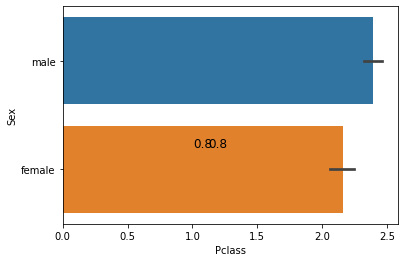

In [174]:
plot = sns.barplot(data=train, x='Pclass',y='Sex')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=12,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')



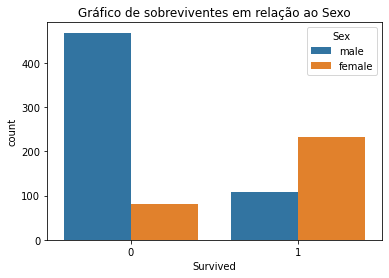

In [175]:
plot = sns.countplot(x='Survived', data=train, hue='Sex').set_title("Gráfico de sobreviventes em relação ao Sexo")


In [176]:
# Podemos notar que entro os sobreviventes a maioria foi do sexo feminino

Text(0.5, 1.0, 'Gráfico de Sobreviventes com base nas classes')

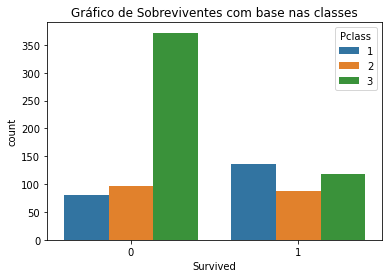

In [177]:
sns.countplot(x='Survived', data=train, hue='Pclass').set_title('Gráfico de Sobreviventes com base nas classes')

Text(0.5, 1.0, 'Gráfico da distribuição de idades')

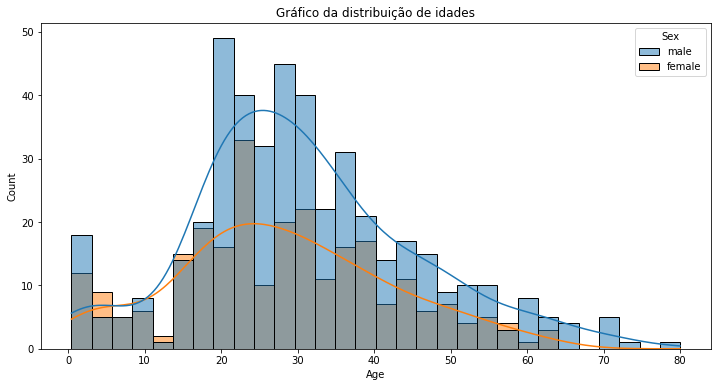

In [178]:
plt.figure(figsize=(12,6))
sns.histplot(data=train,x='Age',bins=30,hue='Sex',kde=True).set_title("Gráfico da distribuição de idades")
# Podemos observar que a maioria dos passajeiros tem entorno de 20 a 30 anos


<AxesSubplot:xlabel='SibSp', ylabel='count'>

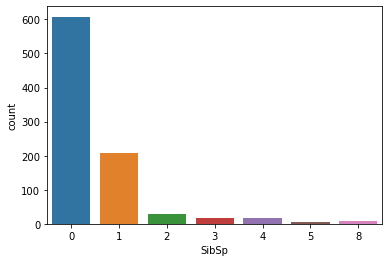

In [179]:
sns.countplot(x='SibSp', data=train)
# a coluna 'SibSp' refere-se a quantidade de acompanhates.
# Podemos notar que a maioria dos passajeiros estavam viajando só ou com um acompanhante.

## Verificando dados faltantes

<AxesSubplot:>

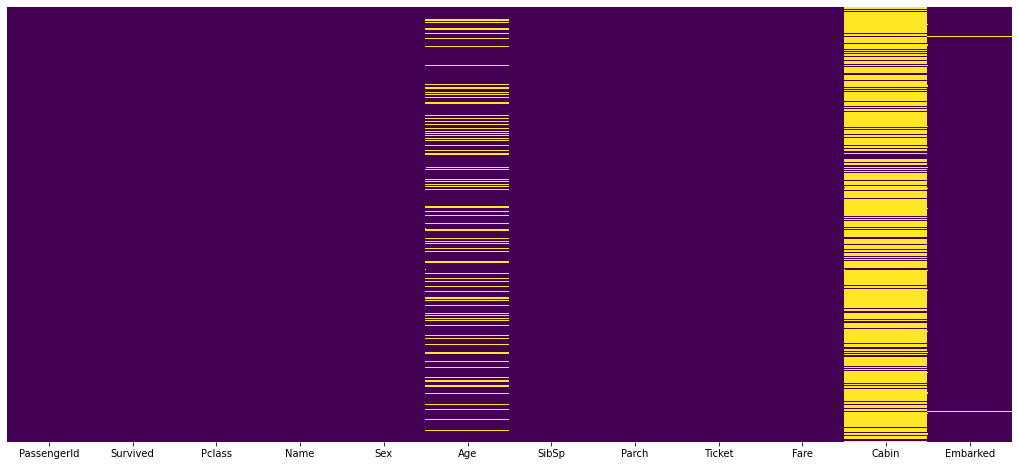

In [180]:
plt.figure(figsize=(18,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [181]:
# A coluna Cabin possui muitos dados faltantes
# Deveremos excuir esta coluna já que aparentemente não é um dado muito relevante

#### Tratamento de dados faltantes
Iremos preencher os dados da coluna Age com a media das idades por class

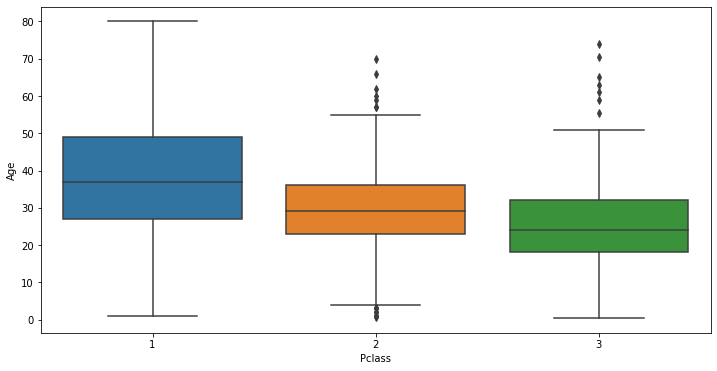

In [182]:
plt.figure(figsize=(12,6))
plot = sns.boxplot(x='Pclass', y='Age', data=train)

In [183]:
# primeira Class = 37
# segunda Class = 29
# terceira Class = 24

In [184]:
df = train[['Age','Pclass']]
df.head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [185]:
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 1),'Age'] = 37
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 2),'Age'] = 29
df.loc[(df['Age'].isnull() ==True )&(df['Pclass'] == 3),'Age'] = 24

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

<AxesSubplot:>

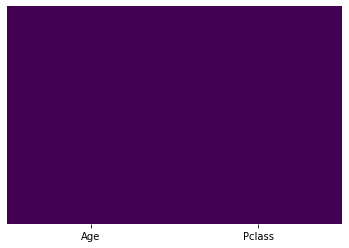

In [186]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Verificando os dados faltantes

In [187]:
df_dados_faltantes = df.isnull().sum()
df_dados_faltantes

Age       0
Pclass    0
dtype: int64

### Limpando dados menos relevantes para o modelo

In [188]:

del train['Cabin']
del train['Ticket']
del train['Embarked']
del train['Name']
# train.drop('Cabin', inplace=True)


In [189]:

del train['Pclass']
del train['Age']


In [190]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,Fare
0,1,0,male,1,0,7.2500
1,2,1,female,1,0,71.2833
2,3,1,female,0,0,7.9250
3,4,1,female,1,0,53.1000
4,5,0,male,0,0,8.0500


## Tratando variaveis categoricas

In [191]:
Sex_dummy = pd.get_dummies(train['Sex'], drop_first=True)


In [193]:
Sex_dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


In [195]:
df.head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


## Juntanto todo o dataFrame

In [198]:
train = pd.concat([df, train,Sex_dummy], axis=1)

Agora deletaremos a coluna 'sex' pois já temos a coluna 'male'

In [208]:
del train['Sex']

<AxesSubplot:>

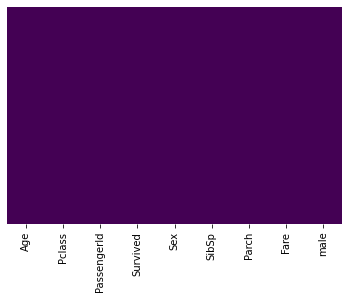

In [200]:
sns.heatmap(train1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [207]:
train.head()

,Age,Pclass,PassengerId,Survived,SibSp,Parch,Fare,male
0,22.0,3,1,0,1,0,7.2500,1
1,38.0,1,2,1,1,0,71.2833,0
2,26.0,3,3,1,0,0,7.9250,0
3,35.0,1,4,1,1,0,53.1000,0
4,35.0,3,5,0,0,0,8.0500,1


In [209]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Pclass       891 non-null    int64  
 2   PassengerId  891 non-null    int64  
 3   Survived     891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


# Devemos realizar todo o procedimento com os dados de teste

In [212]:
train.head()

,Age,Pclass,PassengerId,Survived,SibSp,Parch,Fare,male
0,22.0,3,1,0,1,0,7.2500,1
1,38.0,1,2,1,1,0,71.2833,0
2,26.0,3,3,1,0,0,7.9250,0
3,35.0,1,4,1,1,0,53.1000,0
4,35.0,3,5,0,0,0,8.0500,1


In [219]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [260]:
del test['Name'] 
del test['Cabin']
del test['Embarked']
del test['Ticket']


In [261]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


<AxesSubplot:>

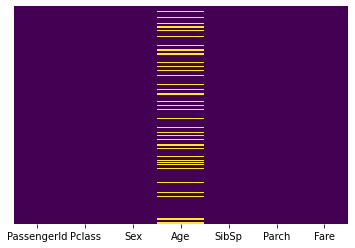

In [262]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [263]:
df_test = test[['Age','Pclass']]
df_test.head()

,Age,Pclass
0,34.5,3
1,47.0,3
2,62.0,2
3,27.0,3
4,22.0,3


<AxesSubplot:>

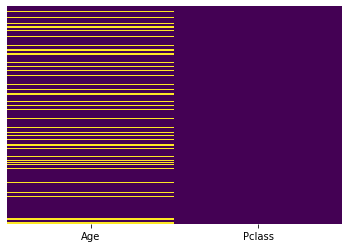

In [264]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [265]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [266]:
df_test['Age'] = df_test.apply(inputar_idade, axis=1)

<ipython-input-266-124ebc68c419>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Age'] = df_test.apply(inputar_idade, axis=1)


<AxesSubplot:>

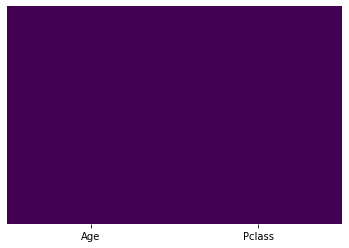

In [267]:
sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [254]:
df_test.head()

,Age,Pclass
0,34.5,3
1,47.0,3
2,62.0,2
3,27.0,3
4,22.0,3


In [268]:
Sex_dummy_test = pd.get_dummies(test['Sex'],drop_first=True)

In [269]:
del test['Sex']

In [270]:
del test['Age']
del test['Pclass']

In [271]:
test1 = pd.concat([Sex_dummy_test,test,df_test],axis=1)

<AxesSubplot:>

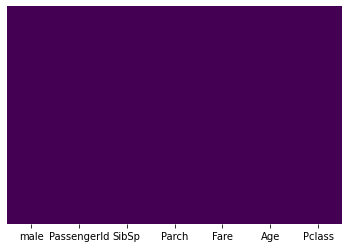

In [272]:
sns.heatmap(test1.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [274]:
df_dados_faltantes_test = test1.isnull().sum()
df_dados_faltantes_test

male           0
PassengerId    0
SibSp          0
Parch          0
Fare           1
Age            0
Pclass         0
dtype: int64

## Tratando mais dados faltantes

In [277]:
# Observar se alguma outra coluna importante não ficou com zero
test1.loc[(test1['Fare'].isnull() ==True )]=0
    

In [278]:
df_dados_faltantes_test = test1.isnull().sum()
df_dados_faltantes_test

male           0
PassengerId    0
SibSp          0
Parch          0
Fare           0
Age            0
Pclass         0
dtype: int64

In [242]:
train.columns

Index(['Age', 'Pclass', 'PassengerId', 'Survived', 'SibSp', 'Parch', 'Fare',
       'male'],
      dtype='object')

In [243]:
y=train['Survived']

In [245]:
X = train[['Age', 'Pclass', 'PassengerId', 'SibSp', 'Parch', 'Fare',
       'male']]

In [246]:
X.head()

,Age,Pclass,PassengerId,SibSp,Parch,Fare,male
0,22.0,3,1,1,0,7.2500,1
1,38.0,1,2,1,0,71.2833,0
2,26.0,3,3,0,0,7.9250,0
3,35.0,1,4,1,0,53.1000,0
4,35.0,3,5,0,0,8.0500,1


In [247]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Criando o modelo

In [248]:
logmodel = LogisticRegression()

In [249]:
logmodel.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Testando o modelo

In [281]:
prections_log = logmodel.predict(test1)

In [282]:
prections_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Criando o arquivo para o Kaggle

In [284]:
test1.head()

,male,PassengerId,SibSp,Parch,Fare,Age,Pclass
0,1,892,0,0,7.8292,34.5,3
1,0,893,1,0,7.0000,47.0,3
2,1,894,0,0,9.6875,62.0,2
3,1,895,0,0,8.6625,27.0,3
4,0,896,1,1,12.2875,22.0,3


In [291]:
sub = pd.Series(prections_log,index=test1['PassengerId'], name = 'Survived')

In [292]:
sub.shape

(418,)

In [294]:
sub.to_csv('PrimeiroModelo_regressaoLogisticaTitanic.csv', header=True)

'head' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
